## Checking File Hardware setup  and configuration

In [3]:
#to check on which hardware (CPU/GPU/TPU) file is running

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
# which GPU you're using and list of all devices

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6790969883232166870
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14328594432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4760699185812697456
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [8]:
#RAM Information

!cat /proc/meminfo

MemTotal:       13294252 kB
MemFree:         8466440 kB
MemAvailable:   11243788 kB
Buffers:           69668 kB
Cached:          2919844 kB
SwapCached:            0 kB
Active:           744176 kB
Inactive:        3690480 kB
Active(anon):       1124 kB
Inactive(anon):  1455604 kB
Active(file):     743052 kB
Inactive(file):  2234876 kB
Unevictable:          12 kB
Mlocked:              12 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               392 kB
Writeback:             0 kB
AnonPages:       1442784 kB
Mapped:           805212 kB
Shmem:             11580 kB
KReclaimable:      80748 kB
Slab:             126488 kB
SReclaimable:      80748 kB
SUnreclaim:        45740 kB
KernelStack:        5840 kB
PageTables:        14820 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6647124 kB
Committed_AS:    3903344 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       78640 kB
VmallocChunk:          0 kB
Percpu:          

In [9]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs mmio_stale_data retbleed
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtua

## ANN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
!pip install -q keras

In [12]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [14]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [17]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [18]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [19]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
import tensorflow
print(tensorflow.__version__)

2.12.0


In [23]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [24]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [26]:
X_train.shape

(8000, 11)

In [30]:
# Fitting the ANN to the Training set

from tensorflow.keras.callbacks import History

# Create an instance of the History callback
histories = History()

# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=100, epochs=100, callbacks=[histories])


Epoch 1/100
54/54 [==============================] - 7s 13ms/step - loss: 0.6749 - accuracy: 0.5779 - val_loss: 0.5893 - val_accuracy: 0.7077
Epoch 2/100
54/54 [==============================] - 0s 9ms/step - loss: 0.5452 - accuracy: 0.7595 - val_loss: 0.5263 - val_accuracy: 0.7781
Epoch 3/100
54/54 [==============================] - 0s 8ms/step - loss: 0.5035 - accuracy: 0.7936 - val_loss: 0.5020 - val_accuracy: 0.7974
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.4845 - accuracy: 0.8003 - val_loss: 0.4875 - val_accuracy: 0.8012
Epoch 5/100
54/54 [==============================] - 0s 7ms/step - loss: 0.4720 - accuracy: 0.8057 - val_loss: 0.4762 - val_accuracy: 0.8050
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4624 - accuracy: 0.8076 - val_loss: 0.4669 - val_accuracy: 0.8042
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4543 - accuracy: 0.8102 - val_loss: 0.4591 - val_accuracy: 0.8039
Epoch 8/100


In [31]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


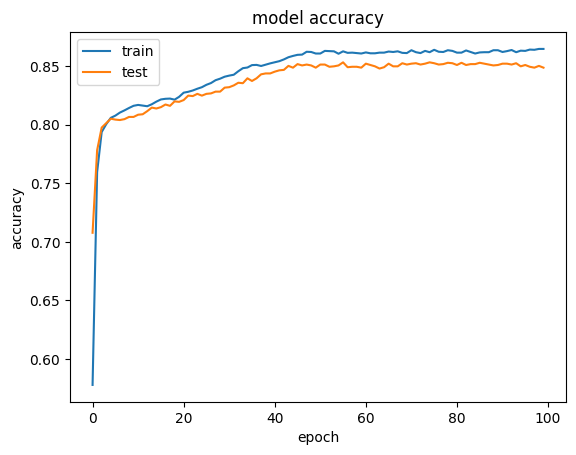

In [32]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

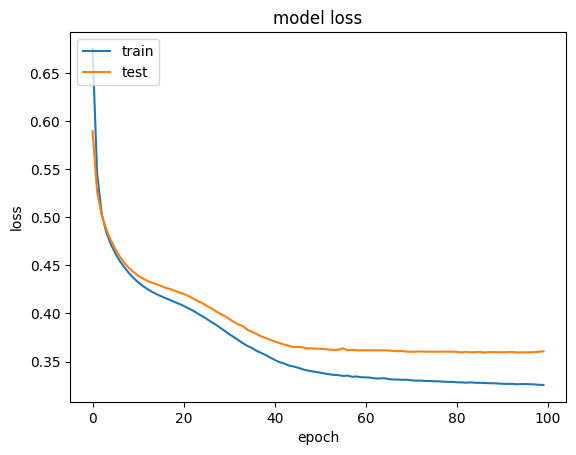

In [33]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [35]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
cm

array([[1497,   98],
       [ 185,  220]])

In [38]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [39]:
score

0.8585